<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

## Data Loading, Establishing a Pandas DataFrame

In [2]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-02-11 19:36:58--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static.lendingclub.com/www/terms-of-use-violation.html?TS-request-id=7868913961544146663 [following]
--2020-02-11 19:36:59--  https://static.lendingclub.com/www/terms-of-use-violation.html?TS-request-id=7868913961544146663
Resolving static.lendingclub.com (static.lendingclub.com)... 99.84.233.32
Connecting to static.lendingclub.com (static.lendingclub.com)|99.84.233.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15677 (15K) [text/html]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs 100%[===================>]  15.31K  --.-KB/s    in 0s      

2020-02-11 19:37:00 (319 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [15677/15677]



In [5]:
!unzip -v /content/LoanStats_2018Q4.csv.zip

Archive:  /content/LoanStats_2018Q4.csv.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/LoanStats_2018Q4.csv.zip or
        /content/LoanStats_2018Q4.csv.zip.zip, and cannot find /content/LoanStats_2018Q4.csv.zip.ZIP, period.


In [11]:
import zipfile
loca_dir='/content/LoanStats_2018Q4.csv.zip'
try:
  with zipfile.ZipFile(loca_dir) as ziped:
    ziped.extract()
except zipfile.BadZipfile:
  print(f"File at \"{loca_dir}\" is a bad zip file :( falling back to alternitive")

File at "/content/LoanStats_2018Q4.csv.zip" is a bad zip file :( falling back to alternitive


In [12]:
# alt link that was posted during lecture of 2017Q1 LoanStats
# this file takes a while to load
from google.colab import files
uploaded=files.upload()

Saving LoanStats_2017Q1.csv to LoanStats_2017Q1.csv


In [15]:
# while thats loading im going to work on setting stuff up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set my path to the .csv file for future referencing
q1_path='/content/LoanStats_2017Q1.csv'
# load df skipping the url at the head and the 2 lines at the footer
df=pd.read_csv(q1_path,skiprows=1,skipfooter=2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


## Data Cleaning

In [19]:
# take a basic look at the informamtion held in the df object
print(df.shape)
print(df.isnull().sum().sort_values())

(96779, 122)
open_il_6m                                 0
delinq_amnt                                0
chargeoff_within_12_mths                   0
avg_cur_bal                                0
acc_open_past_24mths                       0
                                       ...  
sec_app_mths_since_last_major_derog    96423
url                                    96779
member_id                              96779
desc                                   96779
id                                     96779
Length: 122, dtype: int64


In [0]:
#drop fully nan columns because they are taking up space and cant be used
df=df.drop(['id','desc','member_id','url'],axis=1)

In [22]:
# I want a list of columns but there are too many to display without trunication so im going
# to change the options to see them
pd.set_option('display.max_rows',125)
df.dtypes

loan_amnt                                int64
funded_amnt                              int64
funded_amnt_inv                          int64
term                                    object
int_rate                                object
installment                            float64
grade                                   object
sub_grade                               object
emp_title                               object
emp_length                              object
home_ownership                          object
annual_inc                             float64
verification_status                     object
issue_d                                 object
loan_status                             object
pymnt_plan                              object
purpose                                 object
title                                   object
zip_code                                object
addr_state                              object
dti                                    float64
delinq_2yrs  

## Feature Engineering and More Data Cleaning

In [30]:
# look at elements in 2 columns with identical stripping rules
print(df[['int_rate','revol_util']].iloc[0])

# define a funtion to strip theese two columns
def strip_percent(inp) ->float:
  if isinstance(inp,str):
    return float(inp.strip().strip('%'))
  else:
    pass
  return np.NaN

#test=[' 17%','12% ',' 0.01%',np.NaN]
#for i in test:
#  print(f"DBG:{strip_percent(i)}")


int_rate        7.49%
revol_util      14.9%
Name: 0, dtype: object
DBG:17.0
DBG:12.0
DBG:0.01
DBG:nan


In [0]:
# add columns to df for float values
df['intr_rate_float']=df['int_rate'].apply(strip_percent)
df['util_float']=df['revol_util'].apply(strip_percent)

In [32]:
# make sure the changes presisted
df[['intr_rate_float','util_float']].head(10)

,intr_rate_float,util_float
0,7.49,14.9
1,14.99,75.3
2,11.39,30.3
3,10.49,33.2
4,7.24,41.3
5,15.99,26.0
6,14.99,90.1
7,8.24,60.0
8,7.99,52.1
9,5.32,34.5


In [0]:
# define a funtion to clean the job feilds
def clean_job(inp):
  if isinstance(inp, str):
    return inp.strip().title()
  else:
    return "Unknown"

In [34]:
# use the clean_job funtion on the df with the apply function
df['emp_title']=df['emp_title'].apply(clean_job)
df['emp_title'].head(10)

0    Code/Compliance Inspector
1        Senior Superintendent
2                      It Tech
3             Dental Hygienist
4              Program Manager
5         Business Development
6              Lead Supervisor
7     It Lead Business Analyst
8              Registerd Nurse
9                      Radtech
Name: emp_title, dtype: object

In [37]:
# check to make sure there are no NaN's
df['emp_title'].isnull().sum()


0

## Working with Time



In [55]:
# get a list of columns that end with the _d convention for denoting date
time_columns=[col for col in df if col.endswith('_d')]
# interate throuh all of the columns and gather some information to print
for i in time_columns:
  print(f"Column Name:{i}\nhead:\n{df[i].head()}\nValue_counts:\n{df[i].value_counts(dropna=False)}\n\n")

Column Name:issue_d
head:
0   2017-03-01
1   2017-03-01
2   2017-03-01
3   2017-03-01
4   2017-03-01
Name: issue_d, dtype: datetime64[ns]
Value_counts:
2017-03-01    37181
2017-01-01    31835
2017-02-01    27763
Name: issue_d, dtype: int64


Column Name:last_pymnt_d
head:
0          NaT
1          NaT
2          NaT
3          NaT
4   2017-04-01
Name: last_pymnt_d, dtype: datetime64[ns]
Value_counts:
2017-04-01    54403
2017-03-01    24413
NaT           17122
2017-02-01      645
2017-01-01      196
Name: last_pymnt_d, dtype: int64


Column Name:next_pymnt_d
head:
0   2017-04-01
1   2017-04-01
2   2017-04-01
3   2017-04-01
4   2017-05-01
Name: next_pymnt_d, dtype: datetime64[ns]
Value_counts:
2017-05-01    59014
2017-04-01    35513
NaT            2251
2017-06-01        1
Name: next_pymnt_d, dtype: int64


Column Name:last_credit_pull_d
head:
0   2017-04-01
1   2017-04-01
2   2017-04-01
3   2017-04-01
4   2017-04-01
Name: last_credit_pull_d, dtype: datetime64[ns]
Value_counts:
2017-04-01

In [0]:
# its pretty obvious we are going to have to do some work here so im going to try setting the dates
# without chinging any of the nan values if that dose'nt work then i will change them to jan-2001 and then set dates
for col in time_columns:
  df[col] = pd.to_datetime(df[col], infer_datetime_format=True)


In [57]:
# making sure it worked
df[time_columns].dtypes

issue_d               datetime64[ns]
last_pymnt_d          datetime64[ns]
next_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [0]:
#print(f"DBG: columns before add {df.shape[1]}\nDBG: should be {len(time_columns)*2} more when for is done\n")

# used to display my columns after i add them to the df
append_list=[]

# for this section im going to take the years and months and put them in their own columns
# interate through time columns and make a new year and month column with their
# name concated by _year or _month respectivly
for col in time_columns:
  df[f"{col}_year"]=df[col].dt.year
  append_list.append(f"{col}_year")
  df[f"{col}_month"]=df[col].dt.month
  append_list.append(f"{col}_month")

#print(f"DBG: total columns: {df.shape[1]}")


In [62]:
# set a temp virable with both of my lists combined
temp=time_columns+append_list
# print head of my newly made columns and my newly changed time columns
print(df[temp].head())
# look at the data types to make sure everything looks right
df[temp].dtypes

issue_d                     datetime64[ns]
last_pymnt_d                datetime64[ns]
next_pymnt_d                datetime64[ns]
last_credit_pull_d          datetime64[ns]
issue_d_year                         int64
issue_d_month                        int64
last_pymnt_d_year                  float64
last_pymnt_d_month                 float64
next_pymnt_d_year                  float64
next_pymnt_d_month                 float64
last_credit_pull_d_year            float64
last_credit_pull_d_month           float64
dtype: object

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [63]:
 !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-02-11 22:08:24--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.9.77
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.9.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.4MB/s    in 14s     

2020-02-11 22:08:38 (14.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [64]:
 !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [65]:
 %cd instacart_2017_05_01

/content/instacart_2017_05_01


In [67]:
# lets look at what we have
!head -n 5 ./*.csv

==> ./aisles.csv <==
aisle_id,aisle
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods

==> ./departments.csv <==
department_id,department
1,frozen
2,other
3,bakery
4,produce

==> ./order_products__prior.csv <==
order_id,product_id,add_to_cart_order,reordered
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1

==> ./order_products__train.csv <==
order_id,product_id,add_to_cart_order,reordered
1,49302,1,1
1,11109,2,1
1,10246,3,0
1,49683,4,0

==> ./orders.csv <==
order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,1,prior,1,2,08,
2398795,1,prior,2,3,07,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,07,29.0

==> ./products.csv <==
product_id,product_name,aisle_id,department_id
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1


In [0]:
# im thinking im going to go with the time of day the user visits bullet point
# it seems like funner question to answer
order_df=pd.read_csv('orders.csv')

In [0]:
# some tweaks to look and feel
# works well on dark theme
plt.style.use(['ggplot'])
plt.rcParams['axes.facecolor']='404040'
plt.rcParams['figure.facecolor']='black'
plt.rcParams['xtick.color']='ff8000'
plt.rcParams['ytick.color']='ff8000'
plt.rcParams['lines.linewidth']=2.5
plt.rcParams['figure.figsize']=(15,6)


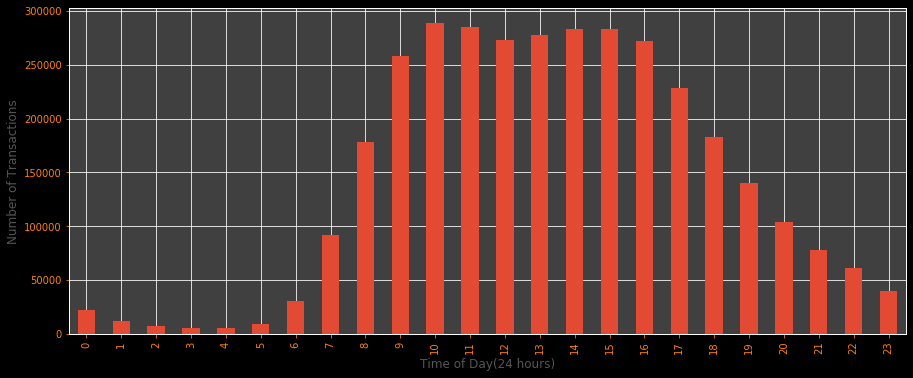

In [106]:
orderTime=order_df.order_hour_of_day.value_counts().sort_index()

orderTime.plot(kind='bar')
plt.xlabel("Time of Day(24 hours)")
plt.ylabel("Number of Transactions")
plt.show()
